In [256]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import copy

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read in data
df = pd.read_csv(r'C:\Users\milli\Downloads\shootingsPolice.csv')

In [260]:
# Look at the data
df.head(3)

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,11.0,NaN,...,6040.3,11.1,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.4
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,1192.7,3.5,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.5
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3179.3,10.9,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.2


In [8]:
# View the 46 columns and types and decide which ones to keep or discard
df.dtypes

State                                                             object
City                                                              object
PD                                                                object
Black People Killed by Police (1/1/2013-12/31/2019)              float64
Hispanic People Killed by Police (1/1/2013-12/31/2019)           float64
Native American People Killed by Police (1/1/2013-12/31/2019)    float64
Asian People Killed by Police (1/1/2013-12/31/2019)              float64
Pacific Islanders Killed by Police (1/1/2013-12/31/2019)         float64
White People Killed by Police (1/1/2013-12/31/2019)              float64
Unknown Race People Killed by Police (1/1/2013-12/31/2019)       float64
All People Killed by Police (1/1/2013-12/31/2019)                float64
Total                                                             object
Black                                                             object
White                                              

In [24]:
# Delete columns that are not needed
df2 = df.drop(columns=['Black-White Dissimilarity Index (2010)', 'Black-White Disparity','Hispanic-White Disparity', 
                      'Violent crimes 2013 (if reported by agency)', 'Violent crimes 2014 (if reported by agency)', 
                      'Violent crimes 2015 (if reported by agency)', 'Violent crimes 2016 (if reported by agency)', 
                      'Violent crimes 2017 (if reported by agency)', 'Violent crimes 2018 (if reported by agency)', 
                      'Average Violent Crimes Reported (2013-17)', '2013 Total Arrests (UCR Data)', '2014 Total Arrests',
                      '2015 Total Arrests', '2016 Total Arrests', '2017 Total Arrests','2018 Total Arrests', 'Estimated Average Arrests per Year',
                      'Unknown Race People Killed by Police (1/1/2013-12/31/2019)', 'Hawaiian', 'Other', 'Two or\nmore races',
                      'Murder and\nnonnegligent manslaughter', 'Murder Rate','Total'])
df2.dtypes


State                                                             object
City                                                              object
PD                                                                object
Black People Killed by Police (1/1/2013-12/31/2019)              float64
Hispanic People Killed by Police (1/1/2013-12/31/2019)           float64
Native American People Killed by Police (1/1/2013-12/31/2019)    float64
Asian People Killed by Police (1/1/2013-12/31/2019)              float64
Pacific Islanders Killed by Police (1/1/2013-12/31/2019)         float64
White People Killed by Police (1/1/2013-12/31/2019)              float64
All People Killed by Police (1/1/2013-12/31/2019)                float64
Black                                                             object
White                                                             object
Amer. Indian                                                      object
Asian                                              

In [141]:
# View missing data
for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

State - 4%
City - 3%
PD - 4%
Black People Killed by Police (1/1/2013-12/31/2019) - 12%
Hispanic People Killed by Police (1/1/2013-12/31/2019) - 33%
Native American People Killed by Police (1/1/2013-12/31/2019) - 89%
Asian People Killed by Police (1/1/2013-12/31/2019) - 69%
Pacific Islanders Killed by Police (1/1/2013-12/31/2019) - 92%
White People Killed by Police (1/1/2013-12/31/2019) - 14%
All People Killed by Police (1/1/2013-12/31/2019) - 4%
Black - 4%
White - 4%
Amer. Indian - 5%
Asian - 5%
Asian/Pacific Islander - 5%
Hispanic - 4%
Avg Annual Police Homicide Rate - 4%
Avg Annual Police Homicide Rate for Black People - 4%
Avg Annual Police Homicide Rate for White People - 4%
Avg Annual Police Homicide Rate for Hispanic People - 4%
Violent Crime Rate - 5%
Killings by Police per 10k Arrests - 8%


In [143]:
# Native American People Killed by Police (1/1/2013-12/31/2019) is 89% missing, so this will be removed as well as  
# Amer. Indian total population. Same idea with Pacific Islanders and Asians.
df3 = df2.drop(columns=['Native American People Killed by Police (1/1/2013-12/31/2019)', 'Amer. Indian',
                       'Pacific Islanders Killed by Police (1/1/2013-12/31/2019)', 'Asian/Pacific Islander',
                       'Asian People Killed by Police (1/1/2013-12/31/2019)', 'Asian'])
for col in df3.columns:
    pct_missing = np.mean(df3[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

State - 4%
City - 3%
PD - 4%
Black People Killed by Police (1/1/2013-12/31/2019) - 12%
Hispanic People Killed by Police (1/1/2013-12/31/2019) - 33%
White People Killed by Police (1/1/2013-12/31/2019) - 14%
All People Killed by Police (1/1/2013-12/31/2019) - 4%
Black - 4%
White - 4%
Hispanic - 4%
Avg Annual Police Homicide Rate - 4%
Avg Annual Police Homicide Rate for Black People - 4%
Avg Annual Police Homicide Rate for White People - 4%
Avg Annual Police Homicide Rate for Hispanic People - 4%
Violent Crime Rate - 5%
Killings by Police per 10k Arrests - 8%


In [145]:
# For the people killed/ total people columns, adjust missing values to zero.
df3["Black People Killed by Police (1/1/2013-12/31/2019)"] = df3["Black People Killed by Police (1/1/2013-12/31/2019)"].fillna(0)
df3["Hispanic People Killed by Police (1/1/2013-12/31/2019)"] = df3["Hispanic People Killed by Police (1/1/2013-12/31/2019)"].fillna(0)
df3["White People Killed by Police (1/1/2013-12/31/2019)"] = df3["White People Killed by Police (1/1/2013-12/31/2019)"].fillna(0)
df3["All People Killed by Police (1/1/2013-12/31/2019)"] = df3["All People Killed by Police (1/1/2013-12/31/2019)"].fillna(0)

df3["Black"] = df3["Black"].fillna(0)
df3["White"] = df3["White"].fillna(0)
df3["Hispanic"] = df3["Hispanic"].fillna(0)

for col in df3.columns:
    pct_missing = np.mean(df3[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

State - 4%
City - 3%
PD - 4%
Black People Killed by Police (1/1/2013-12/31/2019) - 0%
Hispanic People Killed by Police (1/1/2013-12/31/2019) - 0%
White People Killed by Police (1/1/2013-12/31/2019) - 0%
All People Killed by Police (1/1/2013-12/31/2019) - 0%
Black - 0%
White - 0%
Hispanic - 0%
Avg Annual Police Homicide Rate - 4%
Avg Annual Police Homicide Rate for Black People - 4%
Avg Annual Police Homicide Rate for White People - 4%
Avg Annual Police Homicide Rate for Hispanic People - 4%
Violent Crime Rate - 5%
Killings by Police per 10k Arrests - 8%


In [154]:
# The rest of the columns are important for the correlations to look for, so delete the rows with NaN values corresponding to 
# State, City, PD, Avg annual police homicide rates, violent crime rate, and killings by police per 10k arrests
df3.dropna(inplace=True)

for col in df3.columns:
    pct_missing = np.mean(df3[col].isnull())
    print('{} - {}%'.format(col, (pct_missing*100)))



State - 0.0%
City - 0.0%
PD - 0.0%
Black People Killed by Police (1/1/2013-12/31/2019) - 0.0%
Hispanic People Killed by Police (1/1/2013-12/31/2019) - 0.0%
White People Killed by Police (1/1/2013-12/31/2019) - 0.0%
All People Killed by Police (1/1/2013-12/31/2019) - 0.0%
Black - 0.0%
White - 0.0%
Hispanic - 0.0%
Avg Annual Police Homicide Rate - 0.0%
Avg Annual Police Homicide Rate for Black People - 0.0%
Avg Annual Police Homicide Rate for White People - 0.0%
Avg Annual Police Homicide Rate for Hispanic People - 0.0%
Violent Crime Rate - 0.0%
Killings by Police per 10k Arrests - 0.0%


In [152]:
# Now that there is no missing data, check if data types need adjusting.

df3.dtypes

State                                                      object
City                                                       object
PD                                                         object
Black People Killed by Police (1/1/2013-12/31/2019)       float64
Hispanic People Killed by Police (1/1/2013-12/31/2019)    float64
White People Killed by Police (1/1/2013-12/31/2019)       float64
All People Killed by Police (1/1/2013-12/31/2019)         float64
Black                                                      object
White                                                      object
Hispanic                                                   object
Avg Annual Police Homicide Rate                           float64
Avg Annual Police Homicide Rate for Black People          float64
Avg Annual Police Homicide Rate for White People          float64
Avg Annual Police Homicide Rate for Hispanic People       float64
Violent Crime Rate                                        float64
Killings b

In [186]:
# Change the number of people killed to integers.
# Change Black, White, and Hispanic to integers.

df3['Black People Killed by Police (1/1/2013-12/31/2019)'] = df3['Black People Killed by Police (1/1/2013-12/31/2019)'].astype('int64')
df3['Hispanic People Killed by Police (1/1/2013-12/31/2019)'] = df3['Hispanic People Killed by Police (1/1/2013-12/31/2019)'].astype('int64')
df3['White People Killed by Police (1/1/2013-12/31/2019)'] = df3['White People Killed by Police (1/1/2013-12/31/2019)'].astype('int64')
df3['All People Killed by Police (1/1/2013-12/31/2019)'] = df3['All People Killed by Police (1/1/2013-12/31/2019)'].astype('int64')

df3['White'] = df3['White'].str.replace(',', '')
df3['White'] = df3['White'].astype(int)

df3['White'] = df3['White'].str.replace(',', '')
df3['White'] = df3['White'].astype(int)

df3['Hispanic'] = df3['Hispanic'].str.replace(',', '')
df3['Hispanic'] = df3['Hispanic'].astype(int)

df3.dtypes

State                                                      object
City                                                       object
PD                                                         object
Black People Killed by Police (1/1/2013-12/31/2019)         int64
Hispanic People Killed by Police (1/1/2013-12/31/2019)      int64
White People Killed by Police (1/1/2013-12/31/2019)         int64
All People Killed by Police (1/1/2013-12/31/2019)           int64
Black                                                       int32
White                                                       int32
Hispanic                                                    int32
Avg Annual Police Homicide Rate                           float64
Avg Annual Police Homicide Rate for Black People          float64
Avg Annual Police Homicide Rate for White People          float64
Avg Annual Police Homicide Rate for Hispanic People       float64
Violent Crime Rate                                        float64
Killings b

In [188]:
#View Data
df3.head(5)

,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),All People Killed by Police (1/1/2013-12/31/2019),Black,White,Hispanic,Avg Annual Police Homicide Rate,Avg Annual Police Homicide Rate for Black People,Avg Annual Police Homicide Rate for White People,Avg Annual Police Homicide Rate for Hispanic People,Violent Crime Rate,Killings by Police per 10k Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3,18,11,32,14878,229933,255055,8.4,28.8,6.8,10.1,11.1,14.4
1,California,Anaheim,Anaheim Police Department,3,7,3,13,8209,92362,177467,5.5,52.2,4.6,5.6,3.5,14.5
2,Alaska,Anchorage,Anchorage Police Department,1,1,5,13,15308,182814,22061,6.4,9.3,3.9,6.5,10.9,9.2
3,Texas,Arlington,Arlington Police Department,7,1,3,13,67087,164022,100269,5.1,14.9,2.6,1.4,5.3,11.0
4,Georgia,Atlanta,Atlanta Police Department,13,0,1,15,224316,152377,21815,5.1,8.3,0.9,0.0,11.8,6.3


In [250]:
# Sort values by descending average annual police homicide rate
df3 = df3.sort_values(by = ['Avg Annual Police Homicide Rate'], inplace=False, ascending=False)

In [200]:
# Make sure there are no duplicates:

duplicates = df3.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 97, dtype: bool


In [202]:
# The data is clean! Now, on to correlations.

In [321]:
# I think the homicide of black people will have the highest correlation with the average police homicide rate over white or Hispanic people. 

In [286]:
# First delete big cities and nation wide

df.drop(100,axis=0,inplace=True)
df.drop(101,axis=0,inplace=True)


,State,City,PD,Black People Killed by Police (1/1/2013-12/31/2019),Hispanic People Killed by Police (1/1/2013-12/31/2019),Native American People Killed by Police (1/1/2013-12/31/2019),Asian People Killed by Police (1/1/2013-12/31/2019),Pacific Islanders Killed by Police (1/1/2013-12/31/2019),White People Killed by Police (1/1/2013-12/31/2019),Unknown Race People Killed by Police (1/1/2013-12/31/2019),...,Average Violent Crimes Reported (2013-17),Violent Crime Rate,2013 Total Arrests (UCR Data),2014 Total Arrests,2015 Total Arrests,2016 Total Arrests,2017 Total Arrests,2018 Total Arrests,Estimated Average Arrests per Year,Killings by Police per 10k Arrests
0,New Mexico,Albuquerque,Albuquerque Police Department,3.0,18.0,NaN,NaN,NaN,11.0,NaN,...,6040.3,11.1,27700.0,25447.0,22126.0,20341.0,21130.0,22254.0,22259.6,14.4
1,California,Anaheim,Anaheim Police Department,3.0,7.0,NaN,NaN,NaN,3.0,NaN,...,1192.7,3.5,7891.0,8137.0,8381.0,9415.0,8869.0,10019.0,8964.2,14.5
2,Alaska,Anchorage,Anchorage Police Department,1.0,1.0,2.0,NaN,NaN,5.0,4.0,...,3179.3,10.9,17601.0,14748.0,14387.0,13294.0,13871.0,13973.0,14054.6,9.2
3,Texas,Arlington,Arlington Police Department,7.0,1.0,NaN,2.0,NaN,3.0,NaN,...,1921.8,5.3,17258.0,16222.0,13989.0,11024.0,8397.0,9566.0,11839.6,11.0
4,Georgia,Atlanta,Atlanta Police Department,13.0,NaN,NaN,NaN,NaN,1.0,1.0,...,4956.0,11.8,30505.0,26958.0,NaN,22161.0,22581.0,NaN,23900,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Arizona,Tucson,Tucson Police Department,2.0,10.0,NaN,NaN,NaN,10.0,6.0,...,3862.2,7.4,31892.0,32313.0,32294.0,33442.0,30569.0,28858.0,31495.2,8.9
96,Oklahoma,Tulsa,Tulsa Police Department,7.0,4.0,NaN,1.0,NaN,14.0,1.0,...,3937.3,10.0,16360.0,14739.0,15769.0,14311.0,12666.0,13303.0,14157.6,19.1
97,Virginia,Virginia Beach,Virginia Beach Police Department,3.0,NaN,NaN,NaN,NaN,2.0,1.0,...,644.8,1.5,24359.0,23247.0,20259.0,19190.0,18668.0,17071.0,19687,3.0
98,Kansas,Wichita,Wichita Police Department,1.0,2.0,NaN,NaN,NaN,10.0,NaN,...,3932.0,10.3,10566.0,9323.0,9307.0,9120.0,8322.0,3931.0,8000.6,16.2


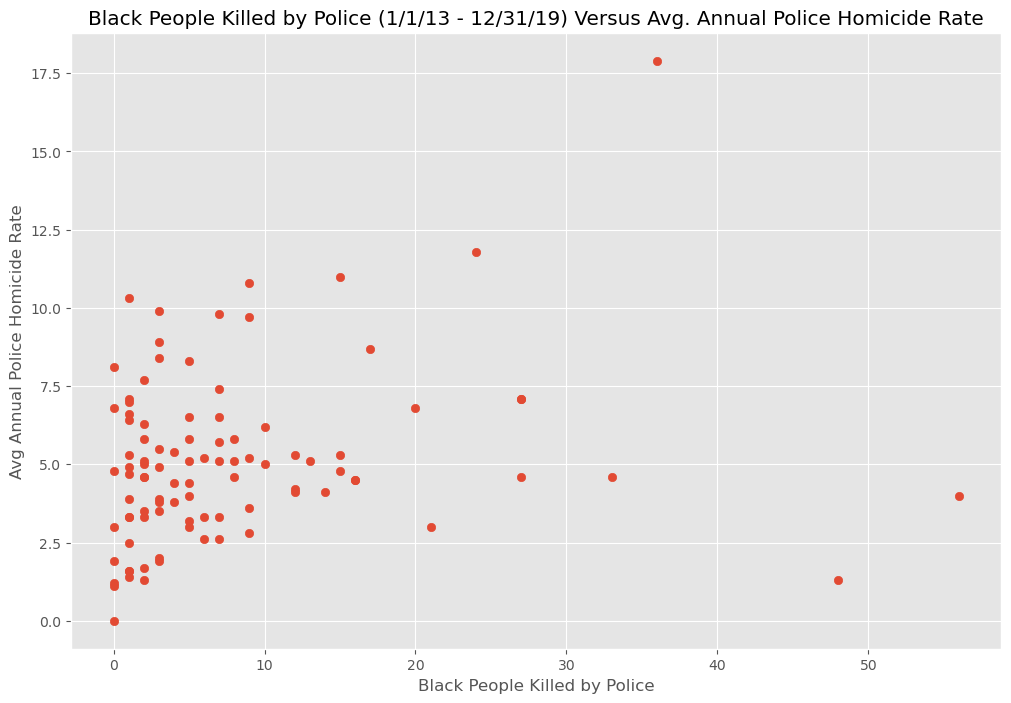

In [307]:
# Scatter plot of black people killed by police vs. average annual police homicide rate of black people


plt.scatter(x = df3['Black People Killed by Police (1/1/2013-12/31/2019)'], y = df3['Avg Annual Police Homicide Rate'])
plt.title('Black People Killed by Police (1/1/13 - 12/31/19) Versus Avg. Annual Police Homicide Rate')
plt.xlabel('Black People Killed by Police')
plt.ylabel('Avg Annual Police Homicide Rate')
plt.show()

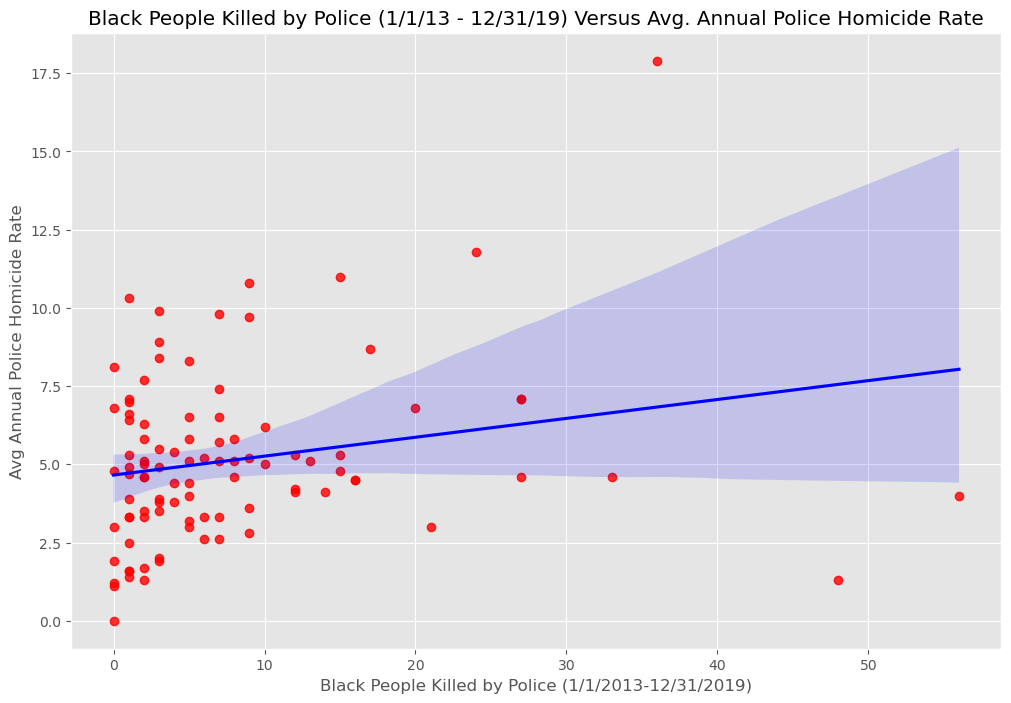

In [309]:
# Plot regression line
sns.regplot(x='Black People Killed by Police (1/1/2013-12/31/2019)', y = 'Avg Annual Police Homicide Rate', 
            data = df3, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})
plt.title('Black People Killed by Police (1/1/13 - 12/31/19) Versus Avg. Annual Police Homicide Rate')
plt.show()

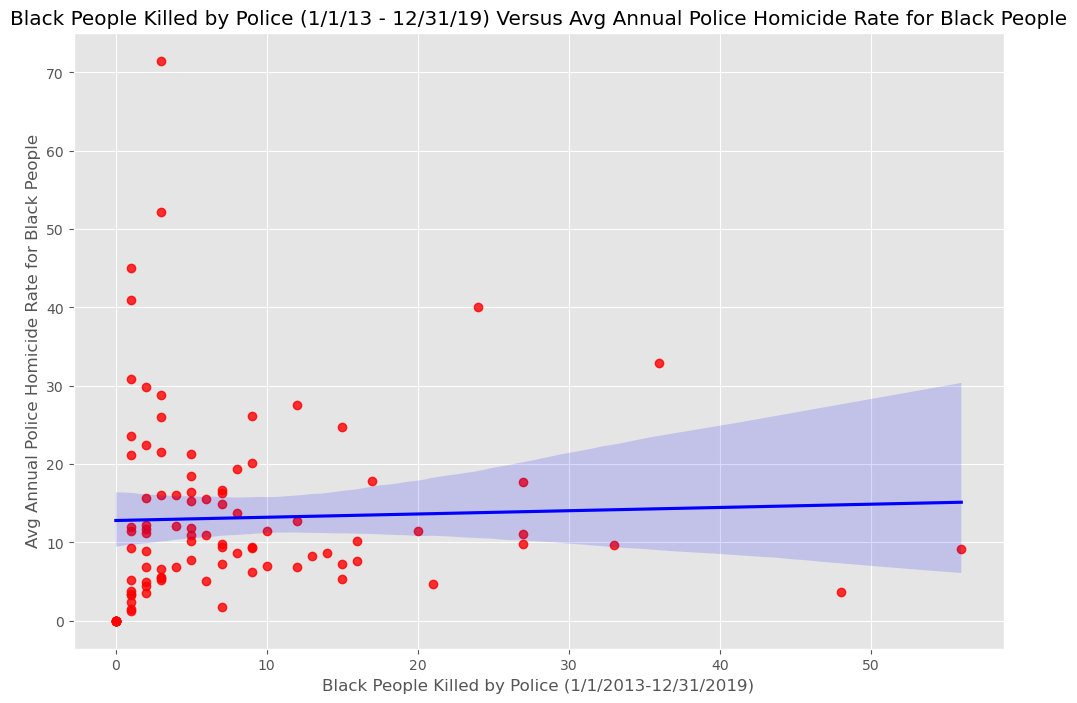

In [311]:
# Look at the same but for homicide of black people by police
sns.regplot(x='Black People Killed by Police (1/1/2013-12/31/2019)', y = 'Avg Annual Police Homicide Rate for Black People', 
            data = df3, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})
plt.title('Black People Killed by Police (1/1/13 - 12/31/19) Versus Avg Annual Police Homicide Rate for Black People')
plt.show()

In [313]:
# The first graph shows a positive correlation between the number of black people killed and the average police homicide rate.
# The second graph shows no correlation between black people being killed and the homicide of black people by police. 

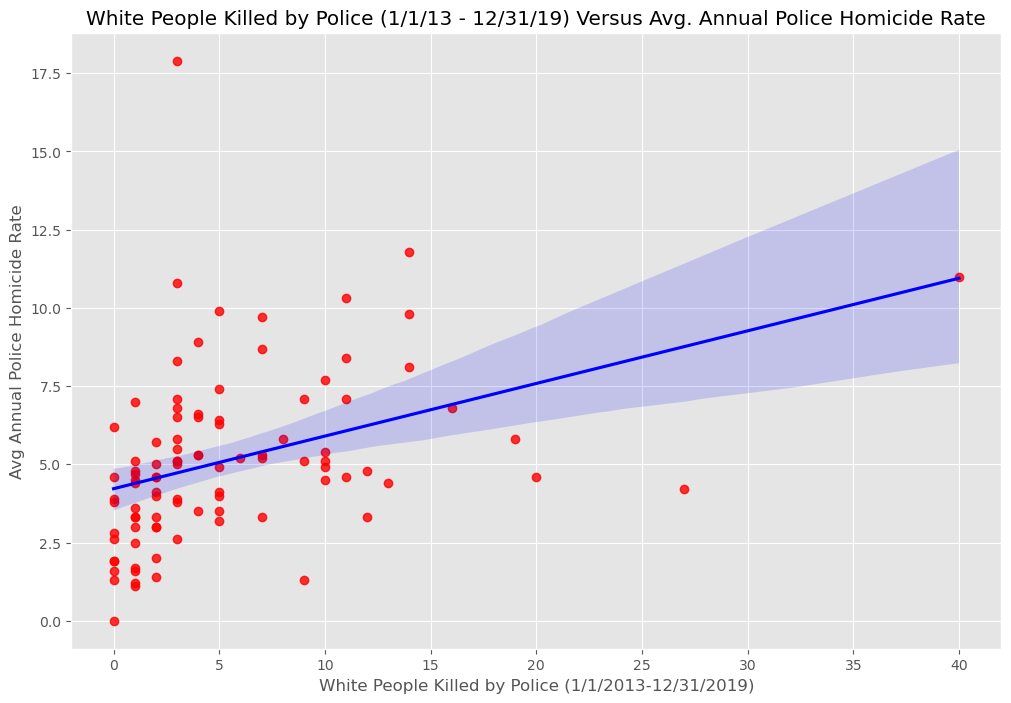

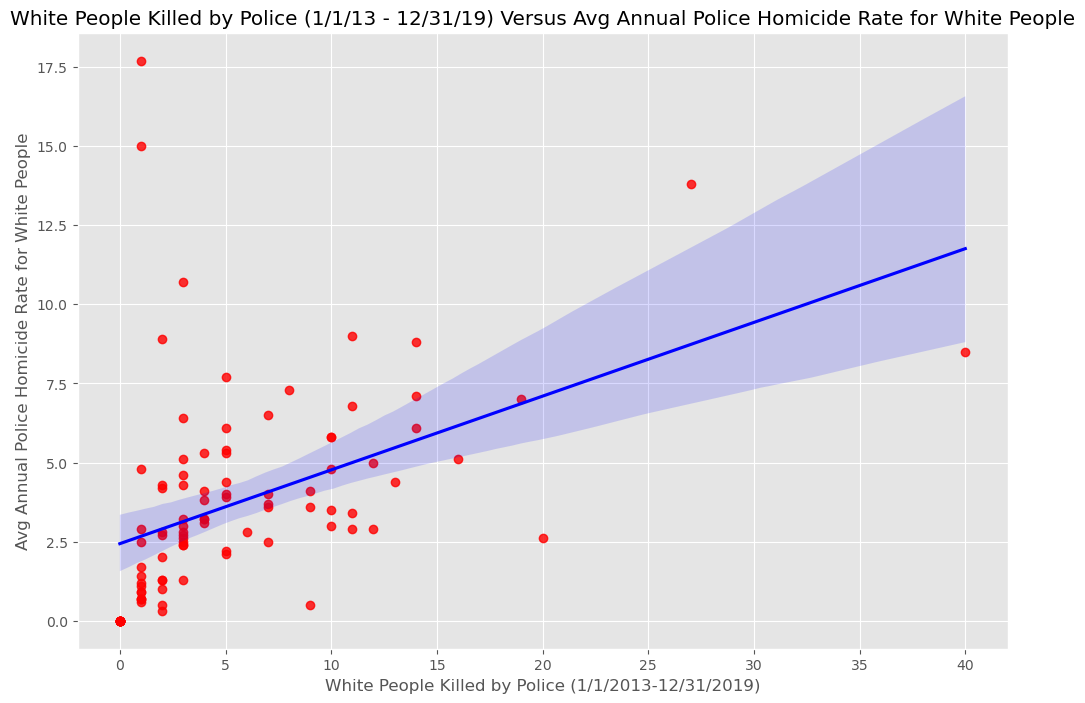

In [315]:
# Now do the same process for white people.

sns.regplot(x='White People Killed by Police (1/1/2013-12/31/2019)', y = 'Avg Annual Police Homicide Rate', 
            data = df3, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})
plt.title('White People Killed by Police (1/1/13 - 12/31/19) Versus Avg. Annual Police Homicide Rate')
plt.show()

sns.regplot(x='White People Killed by Police (1/1/2013-12/31/2019)', y = 'Avg Annual Police Homicide Rate for White People', 
            data = df3, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})
plt.title('White People Killed by Police (1/1/13 - 12/31/19) Versus Avg Annual Police Homicide Rate for White People')
plt.show()

In [317]:
# These graphs each show a positive correlation. So far, my hypothesis has been proven incorrect. 
# There is a strong correlation indicating that 
# as the number of white people killed by police increases, police homicides of white people will also increase.
# In the case of black people killed vs. homicide of a black person, there was no correlation.

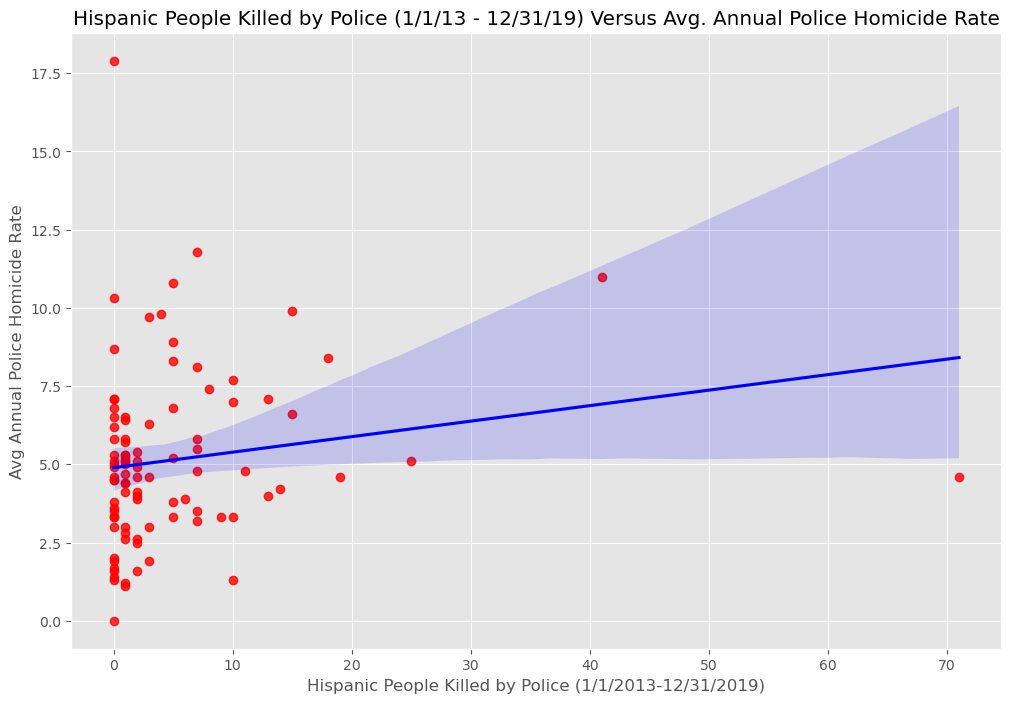

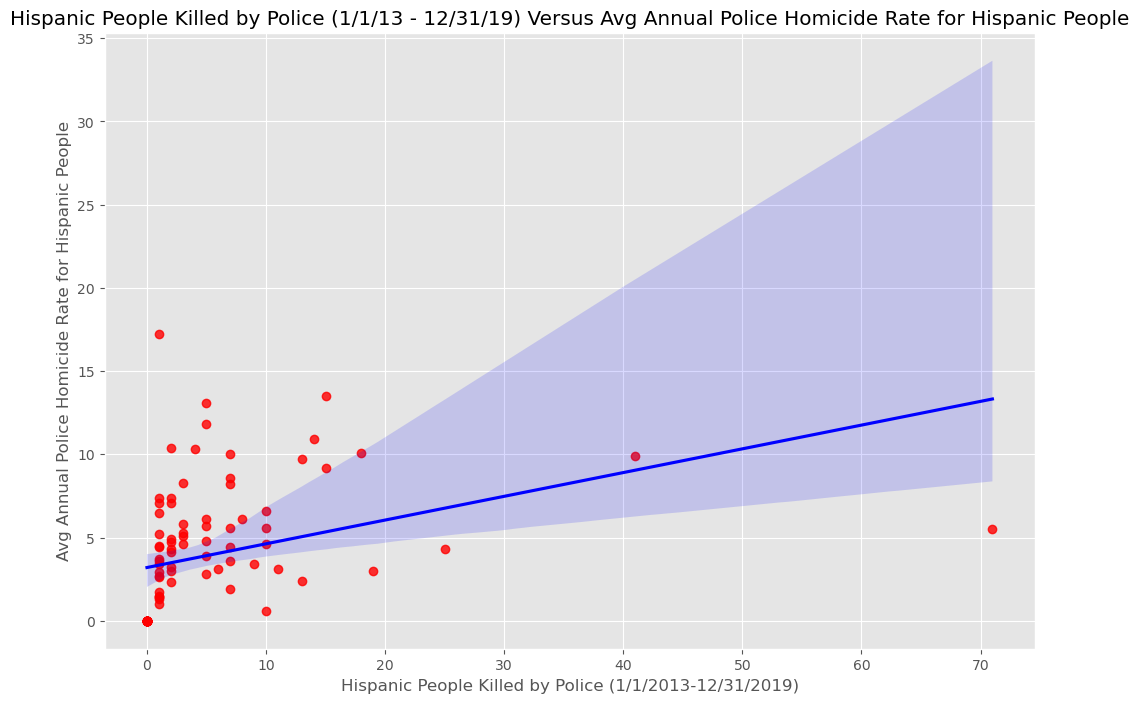

In [319]:
# Next look at the correlations for Hispanic people.
sns.regplot(x='Hispanic People Killed by Police (1/1/2013-12/31/2019)', y = 'Avg Annual Police Homicide Rate', 
            data = df3, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})
plt.title('Hispanic People Killed by Police (1/1/13 - 12/31/19) Versus Avg. Annual Police Homicide Rate')
plt.show()

sns.regplot(x='Hispanic People Killed by Police (1/1/2013-12/31/2019)', y = 'Avg Annual Police Homicide Rate for Hispanic People', 
            data = df3, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})
plt.title('Hispanic People Killed by Police (1/1/13 - 12/31/19) Versus Avg Annual Police Homicide Rate for Hispanic People')
plt.show()

In [323]:
# Again, there is a positive correlation in both graphs. 
# The correlation for white people is the strongest indicating that most police homicides are of white people. 

In [331]:
# Create a numeric representation of non-numeric variables.

df3_numerized = df3
for col_name in df3_numerized.columns:
    if(df3_numerized[col_name].dtype == 'object'):
        df3_numerized[col_name] = df3_numerized[col_name].astype('category')
        df3_numerized[col_name] = df3_numerized[col_name].cat.codes


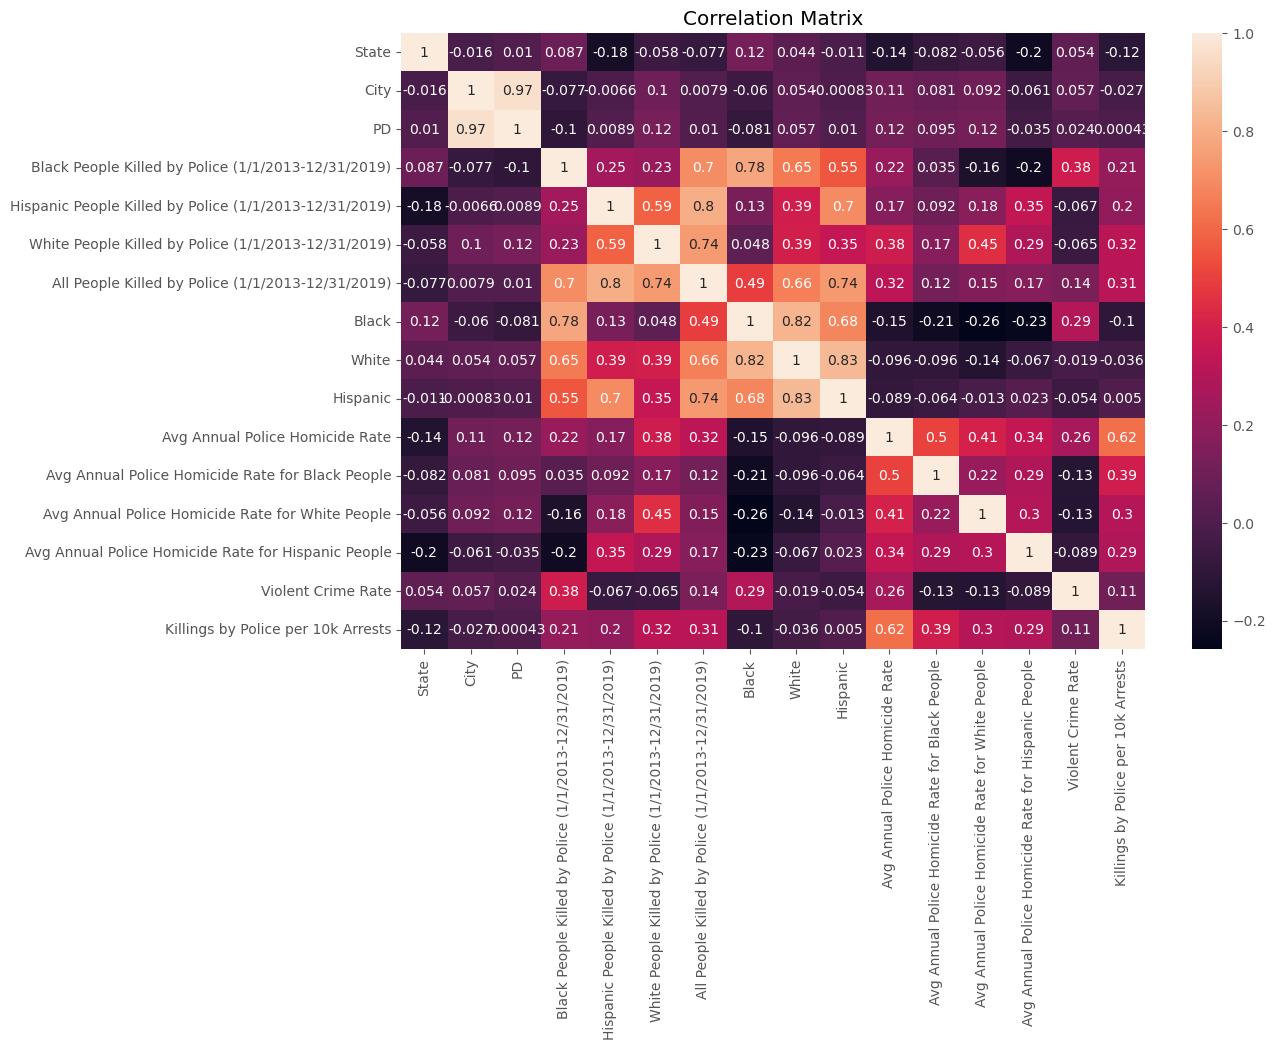

In [335]:
# Create a heat map to view all correlations:

correlation_matrix = df3_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# One thing that stands out is that as the Hispanic or black population rises, the killing of those people rises. 
# Correlation of 0.7 for Hispanic people and 0.78 for black people. 
# However, this correlation for white people is only 0.39.
# Correlation between black people killed and police homicide of black people: 0.035
# Correlation between Hispanic people killed and police homicide of Hispanic people: 0.35
# Correlation between white people killed and police homicide of white people: 0.45

# Two findings: 1. As black and Hispanic populations increase, the killing of these people by police increases. 
#                  This trend is not the same for white people. 
#               2. Although there was not a strong correlation between killings and homicide for any race the correlation increases with 
#                  increasing privilege: black (0.035), Hispanic(0.35), and white(0.45).

# These findings indicate that white people are more likely to get justice for police brutality; fewer are killed and more killings are 
# considered homicides.